Two-Class Classification Model for Predicting the Raining status of cities in Australia

In [209]:
# Import necessary libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [210]:
# Set up Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('CSV Files\weatherAUS.csv').dropna()
y = data.loc[:,['RainTomorrow']]
X = data.drop(columns=['RainTomorrow'])



# Encode String Data to float
OE = OrdinalEncoder()
encoded_feature_names = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


encoded_features_df = X.loc[:, encoded_feature_names]
encoded_features_df = pd.DataFrame(OE.fit_transform(encoded_features_df), columns=encoded_feature_names)
encoded_features_df.index = X.index # reset the index to match the original indexing to match with the rest of the data


transformed_y = pd.DataFrame(OE.fit_transform(y))
transformed_y.index = y.index # reset the index to match the original indexing to match with the rest of the data


# combine the encoded feature data with the rest of the feature data in X
transformed_X = X.drop(columns=encoded_feature_names)
transformed_X[encoded_feature_names] = encoded_features_df



#reorder columns to match original columns
transformed_X = transformed_X[X.columns]


transformed_data = transformed_X
transformed_data['RainTomorrow'] = transformed_y

# debugging
print(X)
print(transformed_data)
'''print(X.info())
print(transformed_X.info())
print(encoded_features_df.info())
print(transformed_y.info())
print(transformed_data.info())'''

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  \
6049        12.3         SSW           48.0        ENE  ...

'print(X.info())\nprint(transformed_X.info())\nprint(encoded_features_df.info())\nprint(transformed_y.info())\nprint(transformed_data.info())'

In [211]:
# Set up train/test data (print)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, transformed_y, test_size=0.3, random_state=16)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

          Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
122297  1882.0      15.0     20.8     28.5       0.0          1.4       4.4   
32165   2061.0      19.0     17.6     37.3       0.0         10.0      10.0   
37127   1005.0      22.0     -0.6     14.5       0.6          1.2       8.1   
102803   657.0      14.0      6.3     12.6       1.0          2.2       0.6   
100921  1784.0      12.0      9.0     18.5       1.2          4.4       9.0   
...        ...       ...      ...      ...       ...          ...       ...   
132366  2751.0       7.0      6.2     11.9       2.4          1.2       2.7   
88431   1607.0       2.0     20.3     28.2       0.0          8.0       9.0   
12336    676.0      11.0      5.8     19.1       0.0         10.6      11.4   
122968  2553.0      15.0     19.1     24.4       0.4          6.4      10.5   
102649   503.0      14.0      7.9     19.5       0.0          3.2      10.4   

        WindGustDir  WindGustSpeed  WindDir9am  ...

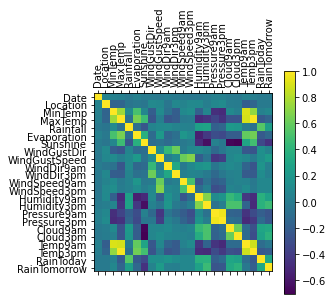

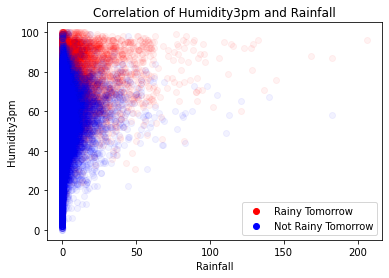

In [218]:
# Visualize data

plt.matshow(transformed_data.corr())
plt.xticks(np.arange(23), transformed_data.columns, rotation=90)
plt.yticks(np.arange(23), transformed_data.columns, rotation=0)
plt.colorbar()
plt.show()


def plot(x_label, y_label, origin_data):
    graph_data = pd.concat([origin_data.loc[:, [x_label]], origin_data.loc[:, [y_label]]], axis=1)
    rain_data = origin_data.loc[origin_data[origin_data['RainTomorrow'] == 0].index.tolist()]
    no_rain_data = origin_data.loc[origin_data[origin_data['RainTomorrow'] == 1].index.tolist()]
    plt.scatter(x=no_rain_data[x_label], y=no_rain_data[y_label], color='red', alpha=0.05, label = 'Rainy Tomorrow')
    plt.scatter(x=rain_data[x_label], y=rain_data[y_label], color='blue', alpha=0.05, label = 'Not Rainy Tomorrow')
    
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'Correlation of {y_label} and {x_label}')
    legend = plt.legend(loc = 'lower right')
    for point in legend.legendHandles: 
        point.set_alpha(1)
    
plot('Rainfall', 'Humidity3pm', transformed_data)   

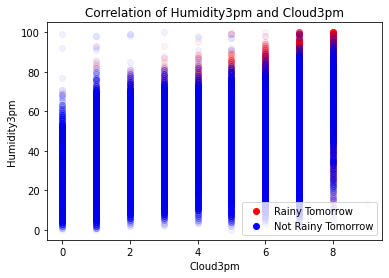

In [219]:
plot('Cloud3pm', 'Humidity3pm', transformed_data)

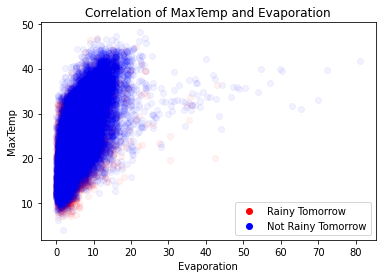

In [220]:
plot('Evaporation', 'MaxTemp', transformed_data)

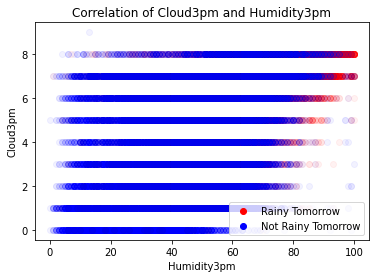

In [221]:
plot('Humidity3pm', 'Cloud3pm', transformed_data)

Score : 1.0
RMSE: 0.0


Text(0.5, 1.0, 'Predicted vs Test Results')

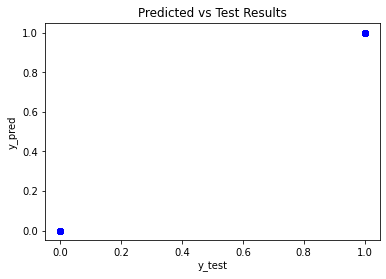

In [216]:
# Train/Test Classification Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

score = accuracy_score(y_test,y_pred)

print('Score :',score) # I'm surprised its 1.0, perhaps I did something wrong?
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(x=y_test, y=y_pred, color='blue', alpha=0.3)
plt.title('Predicted vs Test Results')

# Hard to plot discrete values